In [78]:
#importing necessary libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

In [79]:
#loading data into a dataframe
articles=pd.read_csv('articles1.csv')

In [80]:
#checking the dimensions of the df
print('The dimension of the table is: ',articles.shape)

The dimension of the table is:  (50000, 10)


In [81]:
#displaying first five rows of df
articles.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [82]:
#finding types of variables in the table
print('Describe data \n',articles.describe())
print('Summarized data\n ',articles.describe(include=['O']))

Describe data 
          Unnamed: 0            id          year         month  url
count  50000.000000  50000.000000  50000.000000  50000.000000  0.0
mean   25694.378380  44432.454800   2016.273700      5.508940  NaN
std    15350.143677  15773.615179      0.634694      3.333062  NaN
min        0.000000  17283.000000   2011.000000      1.000000  NaN
25%    12500.750000  31236.750000   2016.000000      3.000000  NaN
50%    25004.500000  43757.500000   2016.000000      5.000000  NaN
75%    38630.250000  57479.250000   2017.000000      8.000000  NaN
max    53291.000000  73469.000000   2017.000000     12.000000  NaN
Summarized data
                                                      title publication  \
count                                               50000       50000   
unique                                              49920           5   
top     The 10 most important things in the world righ...   Breitbart   
freq                                                    7       23781  

In [83]:
#length of data
len(articles)

50000

In [84]:
#displaying publishers
print(articles.publication.unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic']


In [85]:
#displaying min and max of published years
print('Min:',articles.year.min())
print('Max:',articles.year.max())

Min: 2011.0
Max: 2017.0


In [86]:
#display number of articles from each year
print(articles.year.value_counts())

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64


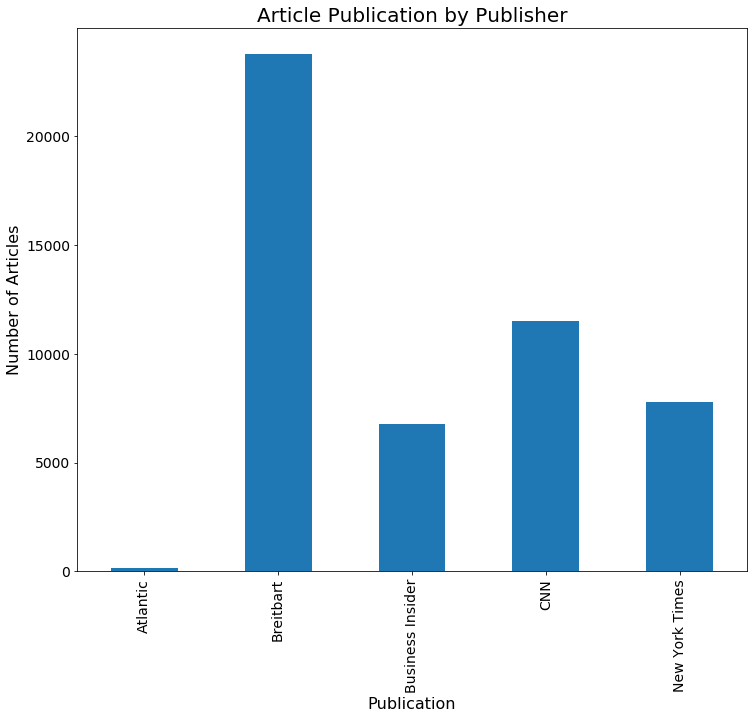

In [87]:
#display bar chart of articles sorted by Publication name
ax=articles.publication.value_counts().sort_index().plot(kind='bar',fontsize=14,figsize=(12,10))
ax.set_title('Article Publication by Publisher',fontsize=20)
ax.set_xlabel('Publication',fontsize=16)
ax.set_ylabel('Number of Articles',fontsize=16)
plt.show()

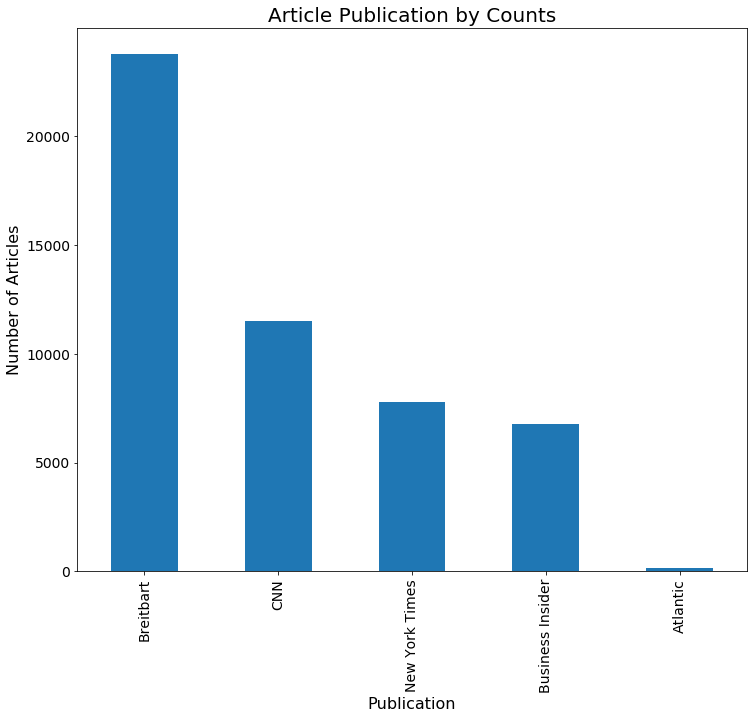

In [88]:
#display bar chart of articles sorted by counts
ax=articles.publication.value_counts().plot(kind='bar',fontsize=14,figsize=(12,10))
ax.set_title('Article Publication by Counts',fontsize=20)
ax.set_xlabel('Publication',fontsize=16)
ax.set_ylabel('Number of Articles',fontsize=16)
plt.show()

In [89]:
#remove punctuation and lowercase

#creates functions that removes punctionation and lowercase
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
print("clean text:  ",articles['tokenized'].head())


clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object


In [90]:
#mean, min, max article lengths

#splitting into words
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))

#mean
print("Mean:  ",articles['num_wds'].mean())

#max
print('Maximum:  ',articles['num_wds'].max())

#min
print('Minimum:  ',articles['num_wds'].min())

Mean:   636.26046
Maximum:   24736
Minimum:   0


In [91]:
#remove articles with no words

#finding number of articles without words
print(len(articles[articles['num_wds']==0]))

#only selecting articles with words
articles1=articles[articles['num_wds']>0]

#looking at how the mean and min changed
print('new mean:  ',articles1['num_wds'].mean())
print('new minimum:  ',articles1['num_wds'].min())

65
new mean:   637.0886752778612
new minimum:   1


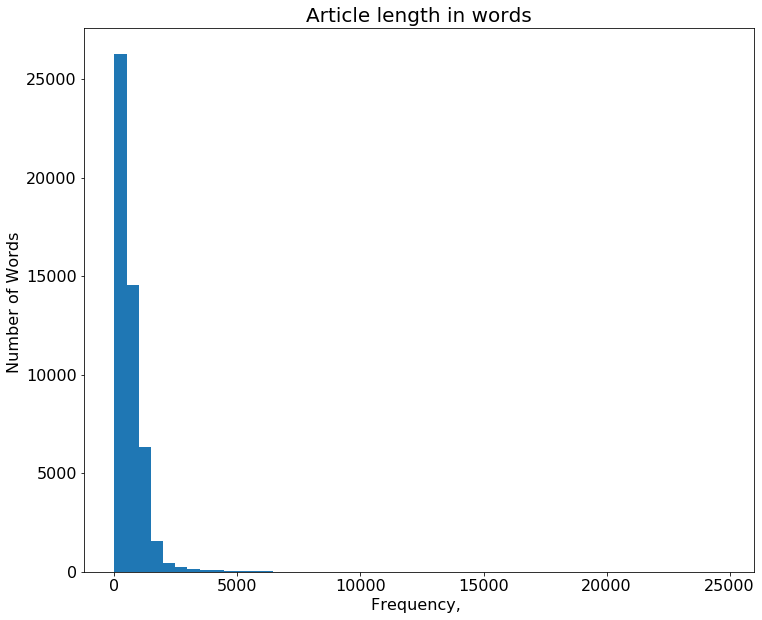

In [92]:
#checking outliers

ax=articles1['num_wds'].plot(kind='hist',bins=50,fontsize=16,figsize=(12,10))
ax.set_title('Article length in words',fontsize=20)
ax.set_xlabel('Frequency, ',fontsize=16)
ax.set_ylabel('Number of Words ',fontsize=16)
plt.show()